# #2


# Fit and Predict Credit Information


I am going to fit and predit credit information of a competition, "Home Credit Default Risk" on Kaggle.


https://www.kaggle.com/c/home-credit-default-risk

In [1]:
import pandas as pd
import lightgbm as lgbm
from sklearn.metrics import roc_auc_score
import numpy as np
import heapq
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
# get the train and test dataset

train = pd.read_csv('"Home Credit Default Risk"_application_train.csv')

test = pd.read_csv('"Home Credit Default Risk"_application_test.csv')

In [3]:
# concatenate the train dataset with the test dataset

train_test = train.append(test)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
# create dummies

new_train_test = pd.get_dummies(train_test)

In [5]:
# split the concatenated dataset into the train dataset and the test dataset

train_input = new_train_test[0: train.shape[0]].copy()

test_input = new_train_test[train.shape[0]:].copy()

## [Task 1] Create a Pipeline

In [6]:
# pipeline

X = train_input.drop("TARGET",axis=1).values
y = train_input.loc[:,'TARGET'].values

In [7]:
# LightGBM

lgbm_train = lgbm.Dataset(X,y)

lgbm_eval = lgbm.Dataset(X, y, reference=lgbm_train)

lgbm_params = {'objective':'binary',
               'boosting_type': 'rf',
               'subsample': 0.623,
               'colsample_bytree': 0.7,
               'num_leaves': 127,
               'max_depth': 8,
               'seed': 99,
               'bagging_freq': 1,
               'n_jobs': 4}

model = lgbm.train(lgbm_params, lgbm_train, valid_sets=lgbm_eval)

[1]	valid_0's binary_logloss: 0.262326
[2]	valid_0's binary_logloss: 0.25312
[3]	valid_0's binary_logloss: 0.251118
[4]	valid_0's binary_logloss: 0.250335
[5]	valid_0's binary_logloss: 0.250268
[6]	valid_0's binary_logloss: 0.250072
[7]	valid_0's binary_logloss: 0.249893
[8]	valid_0's binary_logloss: 0.249758
[9]	valid_0's binary_logloss: 0.249673
[10]	valid_0's binary_logloss: 0.249562
[11]	valid_0's binary_logloss: 0.249642
[12]	valid_0's binary_logloss: 0.24955
[13]	valid_0's binary_logloss: 0.249641
[14]	valid_0's binary_logloss: 0.249725
[15]	valid_0's binary_logloss: 0.249621
[16]	valid_0's binary_logloss: 0.249718
[17]	valid_0's binary_logloss: 0.249586
[18]	valid_0's binary_logloss: 0.24948
[19]	valid_0's binary_logloss: 0.249417
[20]	valid_0's binary_logloss: 0.249535
[21]	valid_0's binary_logloss: 0.249576
[22]	valid_0's binary_logloss: 0.249498
[23]	valid_0's binary_logloss: 0.249422
[24]	valid_0's binary_logloss: 0.24936
[25]	valid_0's binary_logloss: 0.24932
[26]	valid_0's

In [8]:
# predict the train dataset

y_pred = model.predict(X, num_iteration=model.best_iteration)

In [9]:
# compute the AUC

roc_auc_score(y, y_pred)

0.7570752634565502

In [10]:
# compute feature importances

train_features = [f for f in train_input if f not in ['SK_ID_CURR','TARGET']]

fi_lgbm = pd.DataFrame()

fi_lgbm['importance_split'] = model.feature_importance(importance_type='split')
fi_lgbm['importance_gain'] = model.feature_importance(importance_type='gain')

feat_labels = train_input[train_features].columns[0:]

indices_s = np.argsort(fi_lgbm['importance_split'])[::-1]
indices_g = np.argsort(fi_lgbm['importance_gain'])[::-1]

for f in range(train_input[train_features].shape[1]):
    print('%2d) %-*s %f' % (f+1, 30, feat_labels[indices_s[f]], fi_lgbm['importance_split'][indices_s[f]]))
    
for f in range(train_input[train_features].shape[1]):
    print('%2d) %-*s %f' % (f+1, feat_labels[indices_g[f]], fi_lgbm['importance_gain'][indices_g[f]]))    

 1) ORGANIZATION_TYPE_Insurance    0.000000
 2) ORGANIZATION_TYPE_Construction 0.000000
 3) ORGANIZATION_TYPE_Electricity  0.000000
 4) ORGANIZATION_TYPE_Emergency    0.000000
 5) ORGANIZATION_TYPE_Government   0.000000
 6) ORGANIZATION_TYPE_Housing      0.000000
 7) ORGANIZATION_TYPE_Industry: type 1 0.000000
 8) ORGANIZATION_TYPE_Industry: type 10 0.000000
 9) ORGANIZATION_TYPE_Industry: type 11 0.000000
10) ORGANIZATION_TYPE_Industry: type 13 0.000000
11) ORGANIZATION_TYPE_Industry: type 2 0.000000
12) ORGANIZATION_TYPE_Industry: type 3 0.000000
13) ORGANIZATION_TYPE_Industry: type 5 0.000000
14) ORGANIZATION_TYPE_Industry: type 6 0.000000
15) ORGANIZATION_TYPE_Industry: type 7 0.000000
16) ORGANIZATION_TYPE_Industry: type 8 0.000000
17) ORGANIZATION_TYPE_Industry: type 9 0.000000
18) ORGANIZATION_TYPE_Kindergarten 0.000000
19) ORGANIZATION_TYPE_Medicine     0.000000
20) ORGANIZATION_TYPE_Military     0.000000
21) ORGANIZATION_TYPE_Mobile       0.000000
22) ORGANIZATION_TYPE_Other  

IndexError: index 244 is out of bounds for axis 0 with size 244

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


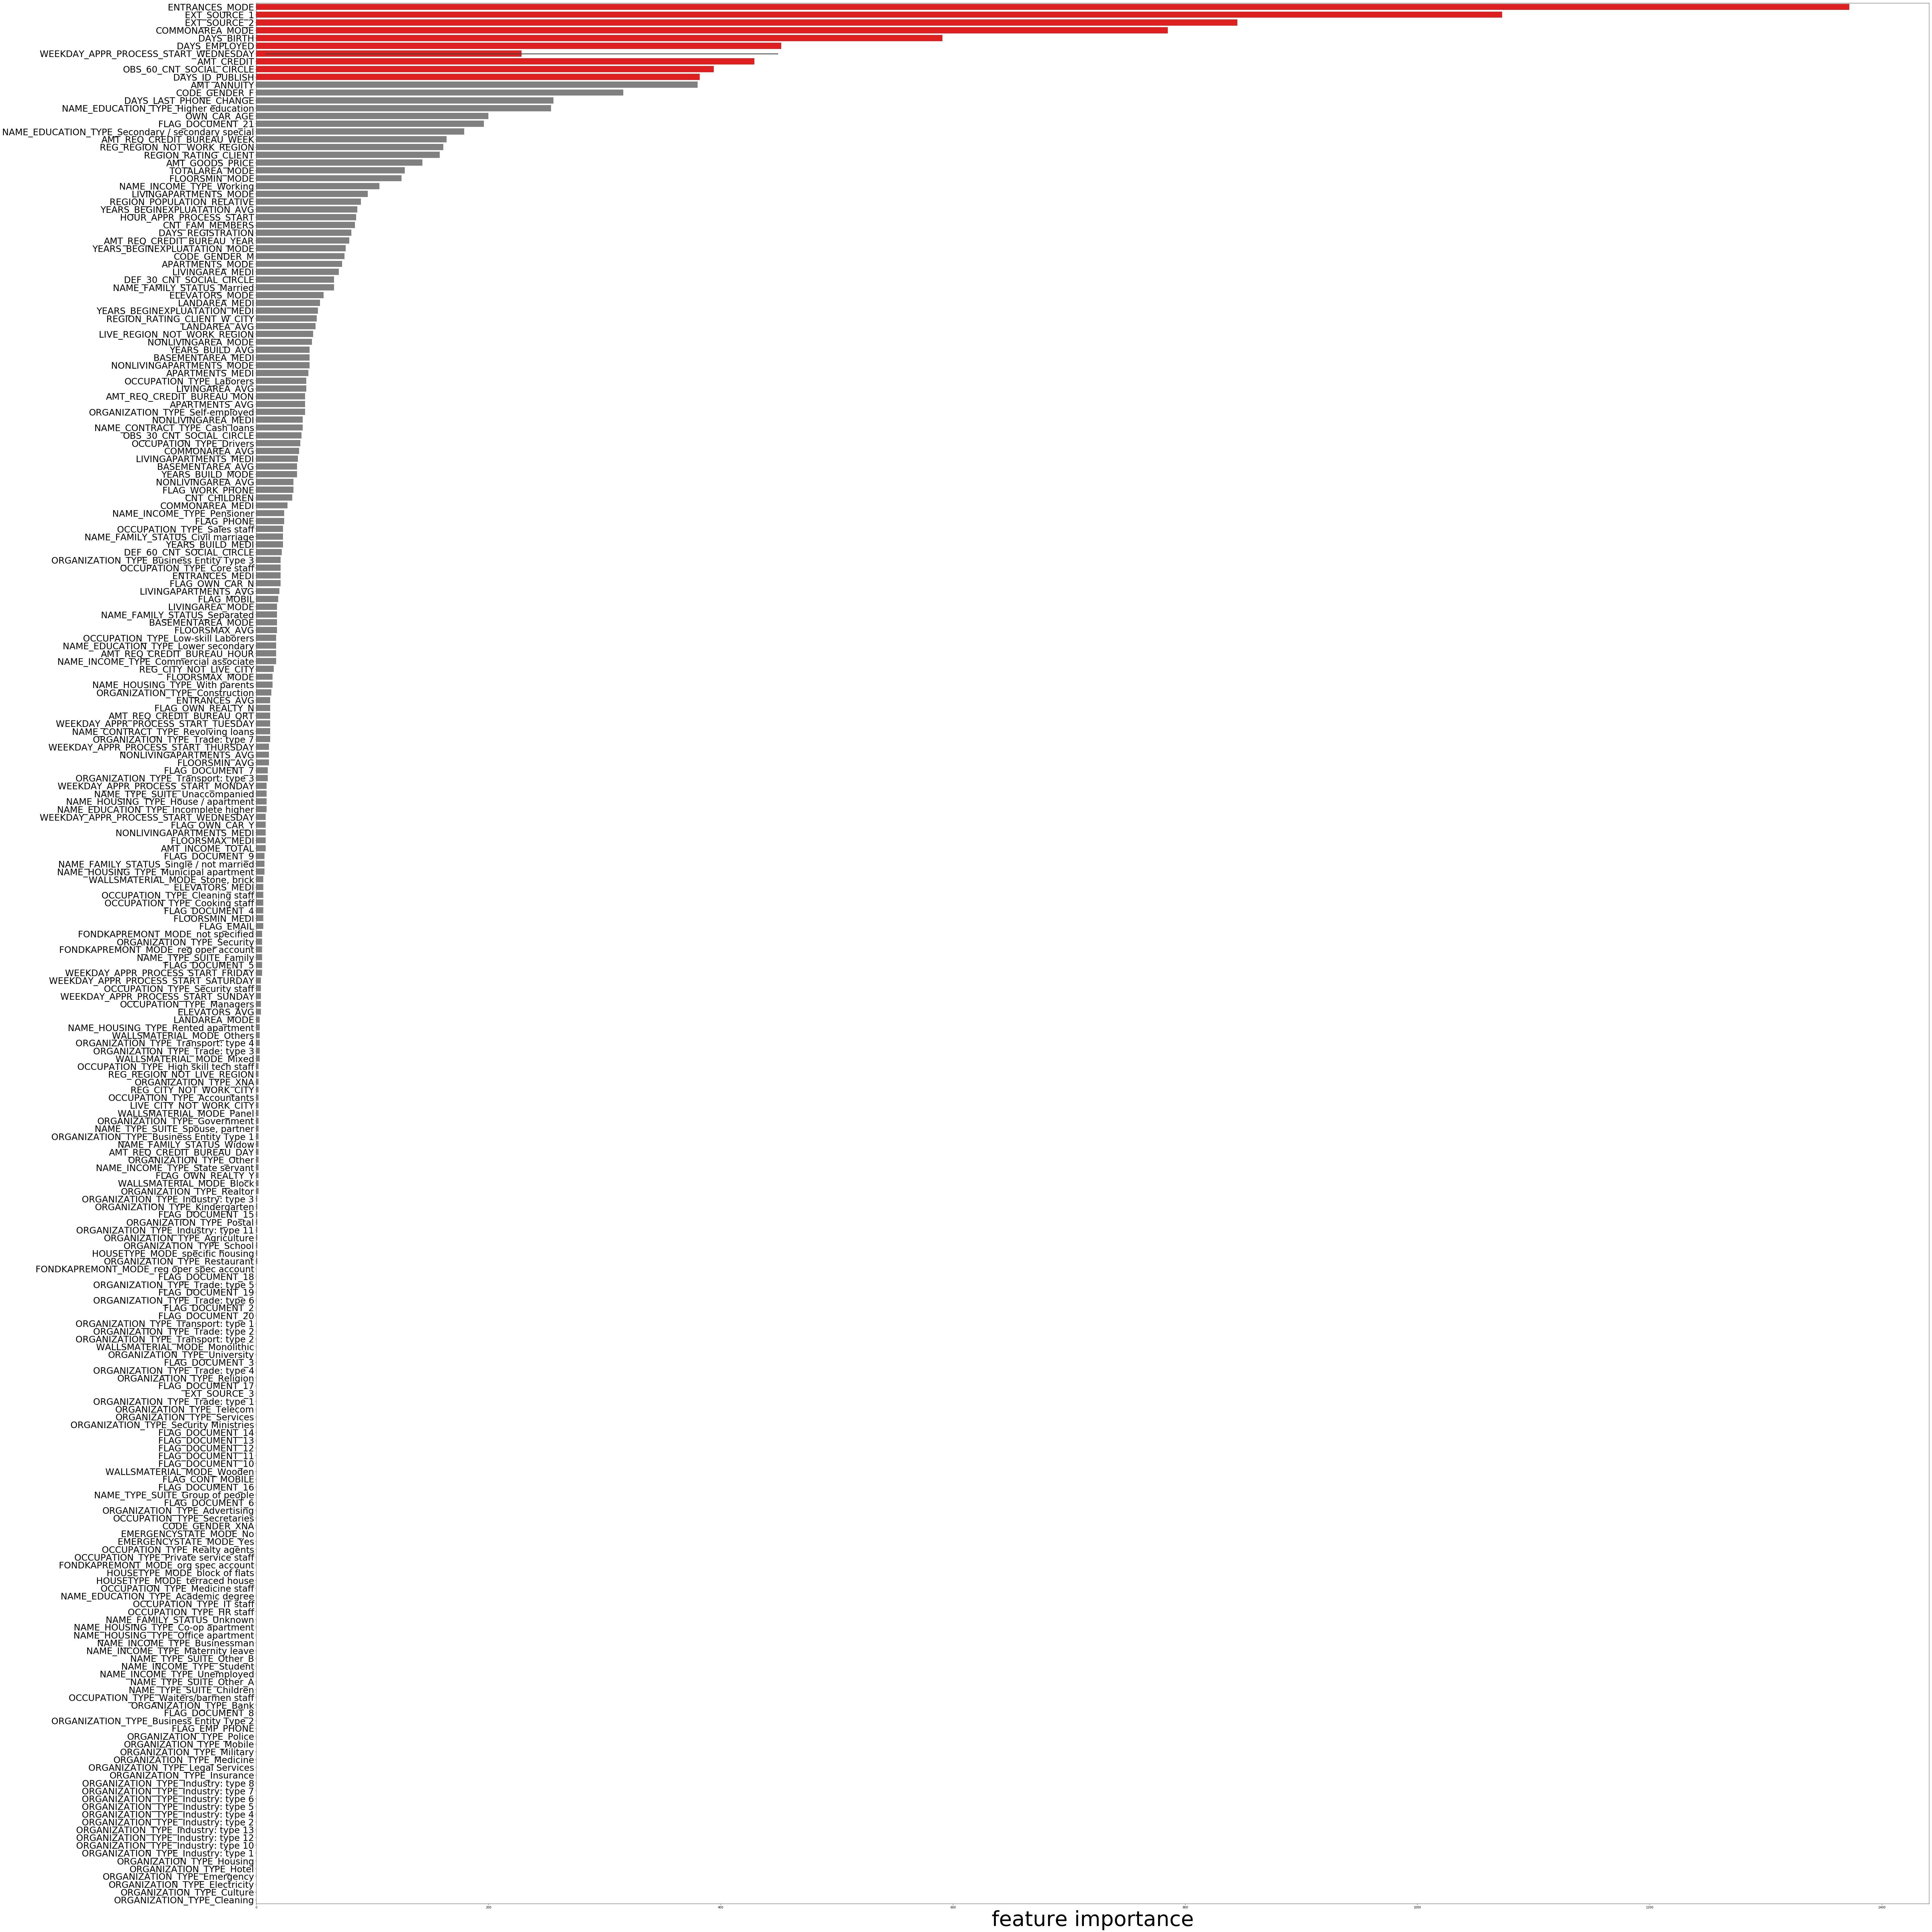

In [11]:
# draw a graph of the feature importances

ranking = np.argsort(-fi_lgbm['importance_split'])

f, ax = plt.subplots(figsize=(90, 90)) 

colors = ['red' if (x>=min(heapq.nlargest(10, fi_lgbm['importance_split'][ranking]))) else 'grey' \
          for x in fi_lgbm['importance_split'][ranking]]

sns.barplot(x=fi_lgbm['importance_split'][ranking], y=train_input[train_features].columns.values[ranking-1], orient='h', palette=colors)

ax.set_xlabel('feature importance',fontsize=70)
ax.set_yticklabels(feat_labels[indices_s-1],fontsize=30)
plt.tight_layout()
plt.show()

## [Task 2] Create a Definition of the AUC

In [12]:
# def of the AUC

## [Task 3] Preprocessing, Feature Enginnering and Fitting

In [13]:
# handle the missing values of the following 7 columns by changing theirown missing values to 0s

edit_missing_values = {"OWN_CAR_AGE":0,"AMT_REQ_CREDIT_BUREAU_YEAR":0,"AMT_REQ_CREDIT_BUREAU_QRT":0,"AMT_REQ_CREDIT_BUREAU_MON":0,
                       "AMT_REQ_CREDIT_BUREAU_DAY":0,"AMT_REQ_CREDIT_BUREAU_HOUR":0,"AMT_REQ_CREDIT_BUREAU_WEEK":0}

edit_train_test = new_train_test.fillna(value=edit_missing_values)

edit_train_test

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5,27517.5,490495.5,454500.0,99000.000,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
6,41301.0,1560726.0,1395000.0,171000.000,0.0,0.0,1.0,1.0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0
7,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
8,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
9,20250.0,405000.0,405000.0,135000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
#  compute the correlation coefficients

corr_mat = edit_train_test.corr()

In [15]:
# check the contents of the "ENTRANCES_MODE"

edit_train_test.ENTRANCES_MODE

0        0.0690
1        0.0345
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12       0.2069
13       0.1379
14       0.1724
15          NaN
16          NaN
17          NaN
18       0.1034
19          NaN
20       0.1379
21          NaN
22       0.2069
23       0.1034
24       0.3103
25       0.1379
26       0.0690
27          NaN
28          NaN
29       0.1379
          ...  
48714       NaN
48715       NaN
48716    0.1034
48717       NaN
48718    0.3103
48719    0.0345
48720    0.1379
48721       NaN
48722       NaN
48723       NaN
48724    0.0345
48725       NaN
48726       NaN
48727    0.0690
48728       NaN
48729       NaN
48730       NaN
48731    0.0690
48732    0.1379
48733    0.1379
48734       NaN
48735    0.0690
48736    0.1034
48737    0.1034
48738       NaN
48739       NaN
48740       NaN
48741    0.1379
48742    0.0690
48743       NaN
Name: ENTRANCES_MODE, Le

In [16]:
edit_train_test.ENTRANCES_MODE.describe()

count    177848.000000
mean          0.145471
std           0.101088
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MODE, dtype: float64

In [17]:
# compute the number of nulls

n_nulls_ENTRANCES_MODE = edit_train_test.ENTRANCES_MODE.isnull().sum()

n_nulls_ENTRANCES_MODE

178407

In [18]:
# computer the missing ratio

print("missing ratio is {}%".format(n_nulls_ENTRANCES_MODE / len(edit_train_test.ENTRANCES_MODE) * 100))

missing ratio is 50.07845503922752%


In [19]:
# get top100 feature values correlated with the "ENTRANCES_MODE"

correlations_ENTRANCES_MODE = corr_mat.nlargest(101, "ENTRANCES_MODE")["ENTRANCES_MODE"].drop("ENTRANCES_MODE")

correlations_ENTRANCES_MODE_table = pd.DataFrame({
    'correlation': correlations_ENTRANCES_MODE
})

correlations_ENTRANCES_MODE_table

,correlation
ENTRANCES_MEDI,0.980909
ENTRANCES_AVG,0.977897
BASEMENTAREA_MODE,0.656455
BASEMENTAREA_MEDI,0.632933
BASEMENTAREA_AVG,0.627765
LIVINGAREA_MODE,0.623230
APARTMENTS_MODE,0.614981
LIVINGAREA_MEDI,0.595369
LIVINGAREA_AVG,0.590859
APARTMENTS_MEDI,0.587481


/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


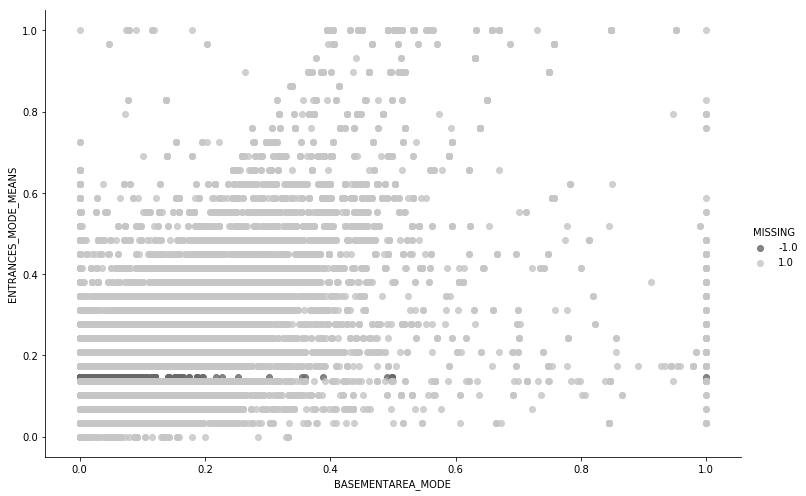

In [20]:
# find a strong relationship with missing values of "ENTRANCES_MODE"

indexer_1 = new_train_test['ENTRANCES_MODE'].isnull()
missing_1 = new_train_test['ENTRANCES_MODE'].copy()
missing_1[indexer_1] = -1
missing_1[~indexer_1] = 1
df_missing_1 = pd.DataFrame(missing_1)
df_missing_1.columns = ['MISSING']


df_ENTRANCES_MODE = new_train_test['ENTRANCES_MODE'].copy()
df_ENTRANCES_MODE[indexer_1] = 0.145471   # mean of "ENTRANCES_MODE"
df_ENTRANCES_MODE = pd.DataFrame(df_ENTRANCES_MODE)
df_ENTRANCES_MODE.columns = ['ENTRANCES_MODE_MEANS']


df_ENTRANCES_MODE_missing = pd.concat([df_missing_1, df_ENTRANCES_MODE, new_train_test], axis=1)

ax = sns.lmplot(x='BASEMENTAREA_MODE', y='ENTRANCES_MODE_MEANS', fit_reg = False, data=df_ENTRANCES_MODE_missing, hue='MISSING', 
                palette='Greys_r', size=7, aspect=1.5)

    - There are not any strong correlations between the missing values of "ENTRANCES_MODE" and "BASEMENTAREA_MODE".

In [21]:
# handle the missing values of "ENTRANCES_MODE" by changing the missing values to medians

edit_columns = []
for _ in train.iloc[:,48:94].columns:
    edit_columns.append(_)

edit_columns.remove("FONDKAPREMONT_MODE")
edit_columns.remove("HOUSETYPE_MODE")
edit_columns.remove('WALLSMATERIAL_MODE')
edit_columns.remove('EMERGENCYSTATE_MODE')

for _ in edit_columns:
    edit2_train_test = edit_train_test.fillna(edit_train_test[_].mean())

edit2_train_test

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5,27517.5,490495.5,454500.0,99000.000,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
6,41301.0,1560726.0,1395000.0,171000.000,0.0,0.0,1.0,1.0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0
7,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
8,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
9,20250.0,405000.0,405000.0,135000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# split the concatenated dataset into the train dataset and the test dataset

train_input2 = edit2_train_test[0: train.shape[0]].copy()

test_input2 = edit2_train_test[train.shape[0]:].copy()

In [23]:
# pipeline

X2 = train_input2.drop("TARGET",axis=1).values
y2 = train_input2.loc[:,'TARGET'].values

In [24]:
# LightGBM

lgbm_train2 = lgbm.Dataset(X2,y2)

lgbm_eval2 = lgbm.Dataset(X2, y2, reference=lgbm_train2)

model2 = lgbm.train(lgbm_params, lgbm_train2, valid_sets=lgbm_eval2)

[1]	valid_0's binary_logloss: 0.262851
[2]	valid_0's binary_logloss: 0.254135
[3]	valid_0's binary_logloss: 0.251915
[4]	valid_0's binary_logloss: 0.251285
[5]	valid_0's binary_logloss: 0.251135
[6]	valid_0's binary_logloss: 0.250867
[7]	valid_0's binary_logloss: 0.250696
[8]	valid_0's binary_logloss: 0.250601
[9]	valid_0's binary_logloss: 0.250479
[10]	valid_0's binary_logloss: 0.250372
[11]	valid_0's binary_logloss: 0.250434
[12]	valid_0's binary_logloss: 0.250353
[13]	valid_0's binary_logloss: 0.250459
[14]	valid_0's binary_logloss: 0.250522
[15]	valid_0's binary_logloss: 0.250344
[16]	valid_0's binary_logloss: 0.250431
[17]	valid_0's binary_logloss: 0.250333
[18]	valid_0's binary_logloss: 0.250262
[19]	valid_0's binary_logloss: 0.250199
[20]	valid_0's binary_logloss: 0.250317
[21]	valid_0's binary_logloss: 0.250348
[22]	valid_0's binary_logloss: 0.250265
[23]	valid_0's binary_logloss: 0.250183
[24]	valid_0's binary_logloss: 0.250145
[25]	valid_0's binary_logloss: 0.250126
[26]	vali

In [25]:
# predict the test dataset

y_pred2 = model2.predict(X2)

In [26]:
# compute the AUC

roc_auc_score(y2,y_pred2)

0.7536798881801385

In [27]:
# predict the test dataset

y_test_pred2 = model2.predict(test_input2.values, num_iteration=model2.best_iteration)

In [28]:
# submittion the result

sub = pd.read_csv('"Home Credit Default Risk"_sample_submission.csv')

sub['TARGET'] = y_test_pred2

sub.to_csv('"Home Credit Default Risk"_pipeline3.csv', index=False)